In [496]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sounddevice as sd

## Task 1)

### Task 1a)

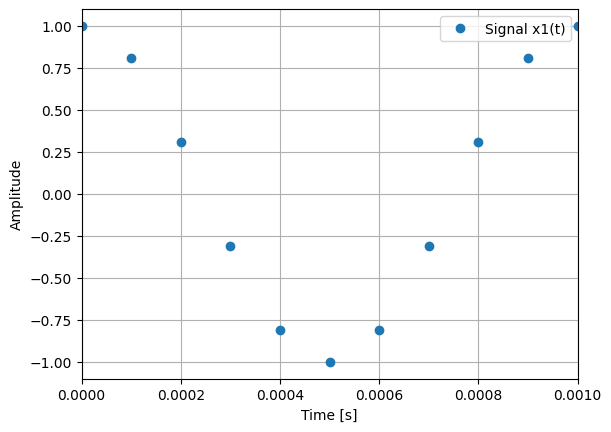

In [497]:
t_0 = 0.0001 
T_k = np.arange(0, 5, t_0 )
results = np.zeros(len(T_k))
freq = 1000
counter = 0
samplerate = 1/ t_0


def cos(f, t):
    return np.cos(2*np.pi*f * t)

for i in T_k:
    results[counter] = cos(freq, i)
    counter+=1

#sd.play(results, samplerate, blocksize = 1024, blocking = True)
fig, ax = plt.subplots()
ax.plot(T_k, results, 'o', label='Signal x1(t)')
ax.set_xlabel('Time [s]')  # Add x-axis label
ax.set_ylabel('Amplitude') # Add y-axis label
ax.set_xlim(0, 0.001)       # Set x-axis limits 0-10 ms
#ax.set_ylim(-1.2, 1.2)     # Set y-axis limits
ax.grid(True)              # Turn on the grid
ax.legend(loc='upper right') # Add legend
plt.show()


### Task 1b)

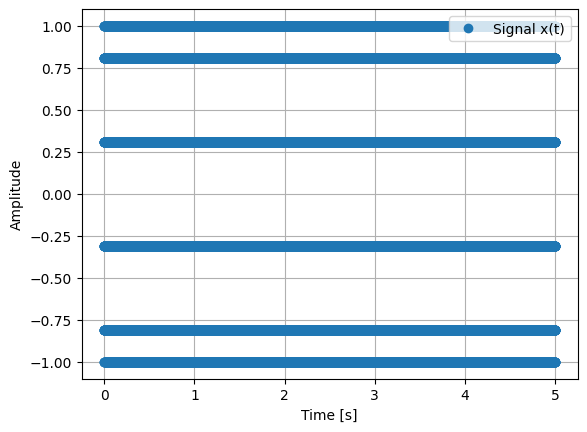

In [498]:

sample_freq = 1100

#sd.play(results, sample_freq, blocksize = 1024,  blocking=True)

fig, ax = plt.subplots()
ax.plot(T_k, results, 'o', label='Signal x(t)')
ax.set_xlabel('Time [s]')  # Add x-axis label
ax.set_ylabel('Amplitude') # Add y-axis label
#ax.set_xlim(0, 0.002)       # Set x-axis limits 0-10 ms
#ax.set_ylim(-1.2, 1.2)     # Set y-axis limits
ax.grid(True)              # Turn on the grid
ax.legend(loc='upper right') # Add legend
plt.show()


### Task 1d)

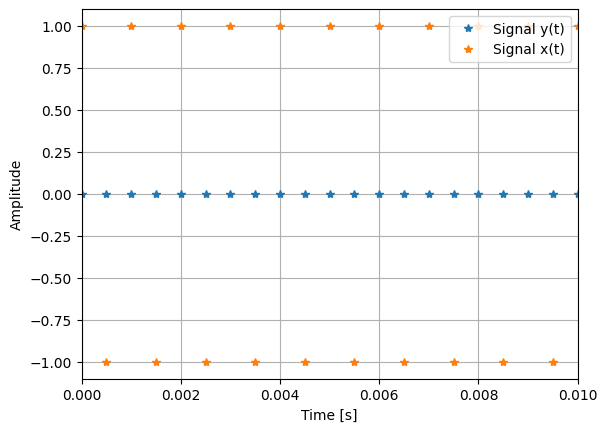

In [499]:
t_0 = 1/ 2000

Tk_sin = np.arange(0, 5, t_0 )

sin_res = np.zeros(len(Tk_sin))
cos_res = np.zeros(len(Tk_sin))

freq = 1000
c = 0
counter = 0


def sin(f, t):
    return np.sin(2*np.pi*f * t)

for i in Tk_sin:
    sin_res[c] = sin(freq, i)
    c+=1

def cos(f, t):
    return np.cos(2*np.pi*f * t)

for i in Tk_sin:
    cos_res[counter] = cos(freq, i)
    counter+=1

#sd.play(sin_res, 2000, blocksize = 1024, blocking=True)
#sd.play(cos_res, 2000, blocksize = 1024, blocking=True, latency =0.2)

fig, ax = plt.subplots()
ax.plot(Tk_sin, sin_res, "*", label='Signal y(t)')
ax.plot(Tk_sin, cos_res, "*",  label='Signal x(t)')
ax.set_xlabel('Time [s]')  # Add x-axis label
ax.set_ylabel('Amplitude') # Add y-axis label
ax.set_xlim(0, 0.01)       # Set x-axis limits 0-10 ms
#ax.set_ylim(-1.2, 1.2)     # Set y-axis limits
ax.grid(True)              # Turn on the grid
ax.legend(loc='upper right') # Add legend
plt.show()


In [500]:
fs = 40000
K = 10*fs

start = 0   # Start value
stop = 10  # Stop value
increment = 1/fs  # Increment value (TODO: we might want to make this even smaller?)

t = np.arange(start, stop, increment)


# print("Start rec")
# x = sd.rec(int(K), fs, channels=1, blocking=True)
# print("Stop rec")

# sd.play(x, fs, blocksize = 1024, blocking=True)

# x = x[::5]
# #x.shape

# sd.play(x, 8000, blocksize = 1024, blocking=True)

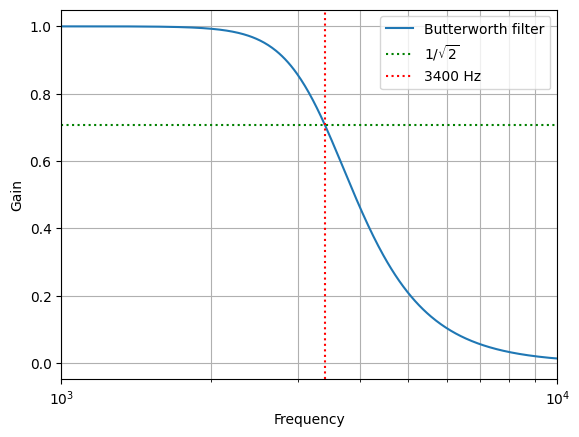

In [501]:
N = 4       #Fourth order
wn = 3400*2*np.pi   #Hz




z, p, k = signal.butter(N, wn, analog=True, output='zpk')

H = signal.ZerosPolesGain(z, p, k)

frequencies = np.logspace(3, 4, 1000)
w, magnitude, phase = signal.bode(H, n=1000)

f = w/(2* np.pi)

magnitude_gain = 10**(magnitude/20)


fig, ax = plt.subplots()
ax.semilogx(f, magnitude_gain, label = "Butterworth filter")

ax.axhline(y = 1/np.sqrt(2), linestyle = "dotted", color = "green" ,label=r"1/$\sqrt{2}$")
ax.axvline(x = 3400, linestyle = "dotted", color = "red" ,label="3400 Hz")
ax.set_xlabel('Frequency')  # Add x-axis label
ax.set_ylabel('Gain') # Add y-axis label
ax.set_xlim(1000, 10000)       # Set x-axis limits 0-10 ms
ax.grid(which="both")              # Turn on the grid
ax.legend(loc='upper right') # Add legend
plt.show()

In [502]:


print("Start rec")
x = sd.rec(int(K), fs, channels=1, blocking=True)
print("Stop rec")

#sd.play(x, fs, blocksize = 1024, blocking=True)

x = x[::5]

print("Before filter:")
sd.play(x, 8000, blocksize = 1024, blocking=True)


# Resample the time vector t accordingly
t = np.linspace(0, len(x) / fs, len(x))

t_filter, x_filter, __= signal.lsim(H, x, t)

print("After filter:")
sd.play(x_filter, 8000, blocksize = 1024, blocking=True)

Start rec
Stop rec
Before filter:
After filter:


TypeError: only length-1 arrays can be converted to Python scalars